# Tabular Data Explanation Benchmarking: Xgboost Regression

This notebook demonstrates how to use the benchmark utility to benchmark the performance of an explainer for tabular data. In this demo, we showcase explanation performance for tree explainer. The metrics used to evaluate are "keep positive" and "keep negative". The masker used is Independent Masker but can also generalize to other tabular maskers. 

The new benchmark utility uses the new API with MaskedModel as wrapper around user-imported model and evaluates masked values of inputs. 

In [1]:
import numpy as np 
import pandas as pd 
import xgboost
import shap 
import shap.benchmark as benchmark
from sklearn.model_selection import train_test_split

### Load Data and Model

In [2]:
# create trained model for prediction function 
untrained_model = xgboost.XGBRegressor(n_estimators=100, subsample=0.3)
X,y = shap.datasets.boston()
X = X.values

test_size = 0.3 
random_state = 0
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

model = untrained_model.fit(X_train, y_train)

### Define Explainer Masker

In [3]:
# use Independent masker as default
masker = shap.maskers.Independent(X)

### Create Explainer Object

In [4]:
# tree explainer is used
explainer = shap.Explainer(model, masker)

### Run SHAP Explanation

In [5]:
shap_values = explainer(X)

### Define Metrics (Sort Order & Perturbation Method)

In [6]:
sort_order = 'positive'
perturbation = 'keep'

### Benchmark Explainer

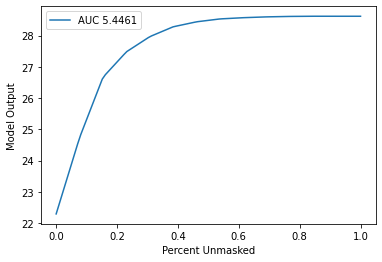

In [7]:
sp = benchmark.perturbation.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
xs, ys, auc = sp.model_score(shap_values, X)
sp.plot(xs, ys, auc)

In [8]:
sort_order = 'negative'
perturbation = 'keep'

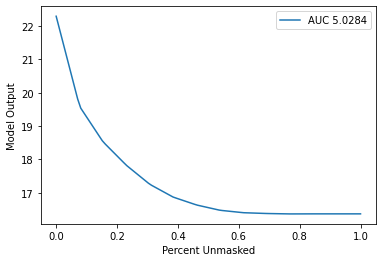

In [9]:
sp = benchmark.perturbation.SequentialPerturbation(explainer.model, explainer.masker, sort_order, perturbation)
xs, ys, auc = sp.model_score(shap_values, X)
sp.plot(xs, ys, auc)